In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from eda.data_loaders.csv_loader import CSVDataLoader
from eda.data_analysis.data_analysis import DataAnalysis
from eda.data_cleaning.data_cleaner import DataCleaning

# load the world cities (wcit) dataset
loader = CSVDataLoader(datasets_dir='datasets')
wcdf = loader.load_data("worldcities.csv")

# perform data analysis
analysis = DataAnalysis(wcdf)

# perform data cleaning
cleaning = DataCleaning(wcdf)

In [2]:
analysis.initial()

self.df.head(10)
          city   city_ascii      lat       lng      country iso2 iso3  \
0        Tokyo        Tokyo  35.6897  139.6922        Japan   JP  JPN   
1      Jakarta      Jakarta  -6.1750  106.8275    Indonesia   ID  IDN   
2        Delhi        Delhi  28.6100   77.2300        India   IN  IND   
3    Guangzhou    Guangzhou  23.1300  113.2600        China   CN  CHN   
4       Mumbai       Mumbai  19.0761   72.8775        India   IN  IND   
5       Manila       Manila  14.5958  120.9772  Philippines   PH  PHL   
6     Shanghai     Shanghai  31.1667  121.4667        China   CN  CHN   
7    São Paulo    Sao Paulo -23.5500  -46.6333       Brazil   BR  BRA   
8        Seoul        Seoul  37.5600  126.9900  South Korea   KR  KOR   
9  Mexico City  Mexico City  19.4333  -99.1333       Mexico   MX  MEX   

         admin_name  capital  population          id  
0             Tōkyō  primary  37732000.0  1392685764  
1           Jakarta  primary  33756000.0  1360771077  
2             

In [3]:
analysis.check_dups_and_value_counts_col('population')

Duplicates for column 'population':
15032

Value Counts for column 'population':
population
10000.0    115
9000.0      74
15000.0     71
13000.0     61
12000.0     56
          ... 
94247.0      1
94398.0      1
93056.0      1
93188.0      1
40.0         1
Name: count, Length: 29658, dtype: int64


In [4]:
analysis.check_dups_and_value_counts_col('city')

Duplicates for column 'city':
3348

Value Counts for column 'city':
city
Santa Cruz              17
San Fernando            16
Santa Ana               15
San Juan                14
Victoria                12
                        ..
Simojovel de Allende     1
Padre Garcia             1
Roskilde                 1
Galveston                1
Nordvik                  1
Name: count, Length: 41343, dtype: int64


In [5]:
wcdf['city'].nunique()

41343

In [6]:
wcdf['population'].nunique()

29658

In [7]:
cleaning.dropna_col('population')

Cannot dropna for column population as it has less than 75% missing values.


In [8]:
wcdf.duplicated().value_counts()

False    44691
Name: count, dtype: int64

In [9]:
wcdf.describe()

,lat,lng,population,id
count,44691.000000,44691.000000,4.438400e+04,4.469100e+04
mean,25.933692,14.526105,1.143739e+05,1.454094e+09
std,23.225258,71.153080,7.148542e+05,2.625680e+08
min,-54.933300,-179.600000,0.000000e+00,1.004003e+09
25%,12.900000,-48.109750,1.218700e+04,1.250637e+09
50%,32.340000,13.500000,2.099900e+04,1.380780e+09
75%,43.333300,77.316550,4.800775e+04,1.705844e+09
max,81.716600,179.370300,3.773200e+07,1.934976e+09


In [10]:
highest_population_city = wcdf.loc[wcdf['population'].idxmax()]
highest_population_city

city               Tokyo
city_ascii         Tokyo
lat              35.6897
lng             139.6922
country            Japan
iso2                  JP
iso3                 JPN
admin_name         Tōkyō
capital          primary
population    37732000.0
id            1392685764
Name: 0, dtype: object

In [11]:
lowest_population_city = wcdf.loc[wcdf['population'].idxmin()]
lowest_population_city

city             Lipkovo
city_ascii       Lipkovo
lat              42.1553
lng              21.5875
country        Macedonia
iso2                  MK
iso3                 MKD
admin_name       Lipkovo
capital            admin
population           0.0
id            1807754347
Name: 11739, dtype: object

In [12]:
# Sort the dataset by 'population' column in descending order
# save it into a new dataset
sorted_sample_df = wcdf.sort_values(by='population', ascending=False)

# Save the top20 most populated cities
top20_population = sorted_sample_df.nlargest(20, 'population')
print(top20_population)

            city    city_ascii      lat       lng        country iso2 iso3  \
0          Tokyo         Tokyo  35.6897  139.6922          Japan   JP  JPN   
1        Jakarta       Jakarta  -6.1750  106.8275      Indonesia   ID  IDN   
2          Delhi         Delhi  28.6100   77.2300          India   IN  IND   
3      Guangzhou     Guangzhou  23.1300  113.2600          China   CN  CHN   
4         Mumbai        Mumbai  19.0761   72.8775          India   IN  IND   
5         Manila        Manila  14.5958  120.9772    Philippines   PH  PHL   
6       Shanghai      Shanghai  31.1667  121.4667          China   CN  CHN   
7      São Paulo     Sao Paulo -23.5500  -46.6333         Brazil   BR  BRA   
8          Seoul         Seoul  37.5600  126.9900    South Korea   KR  KOR   
9    Mexico City   Mexico City  19.4333  -99.1333         Mexico   MX  MEX   
10         Cairo         Cairo  30.0444   31.2358          Egypt   EG  EGY   
11      New York      New York  40.6943  -73.9249  United States

In [13]:
# Scale, round to millions and convert top20 populated cities to a NumPy array
p = round(top20_population.population / 1e6, 3).to_numpy()
print(p)

[37.732 33.756 32.226 26.94  24.973 24.922 24.073 23.086 23.016 21.804
 20.296 18.973 18.627 18.522 18.502 18.007 17.619 17.332 16.71  16.637]


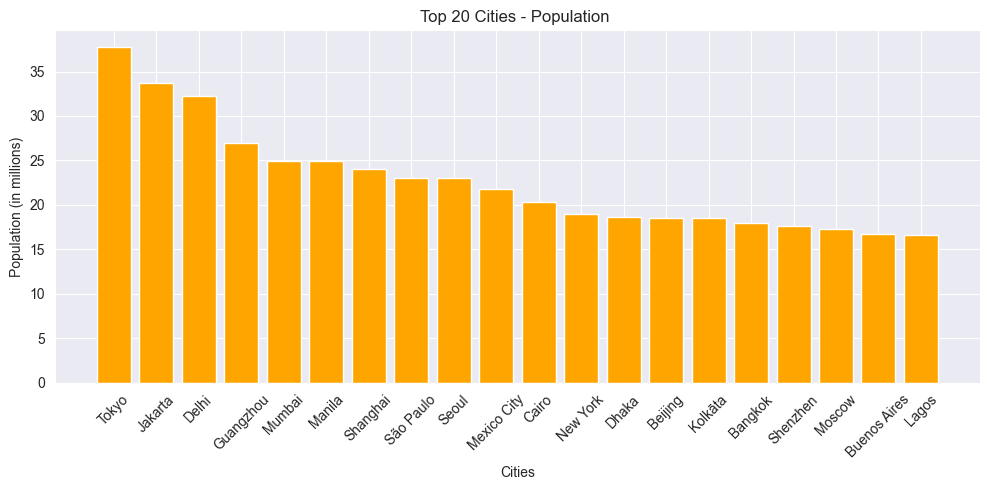

In [14]:
# convert top20 populated cities to a NumPy array
cities = top20_population['city'].to_numpy()

# Plot data of top20 cities in terms of population
plt.figure(figsize=(10, 5))
plt.bar(cities, p, color="orange")
plt.xlabel('Cities')
plt.ylabel('Population (in millions)')
plt.title('Top 20 Cities - Population ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

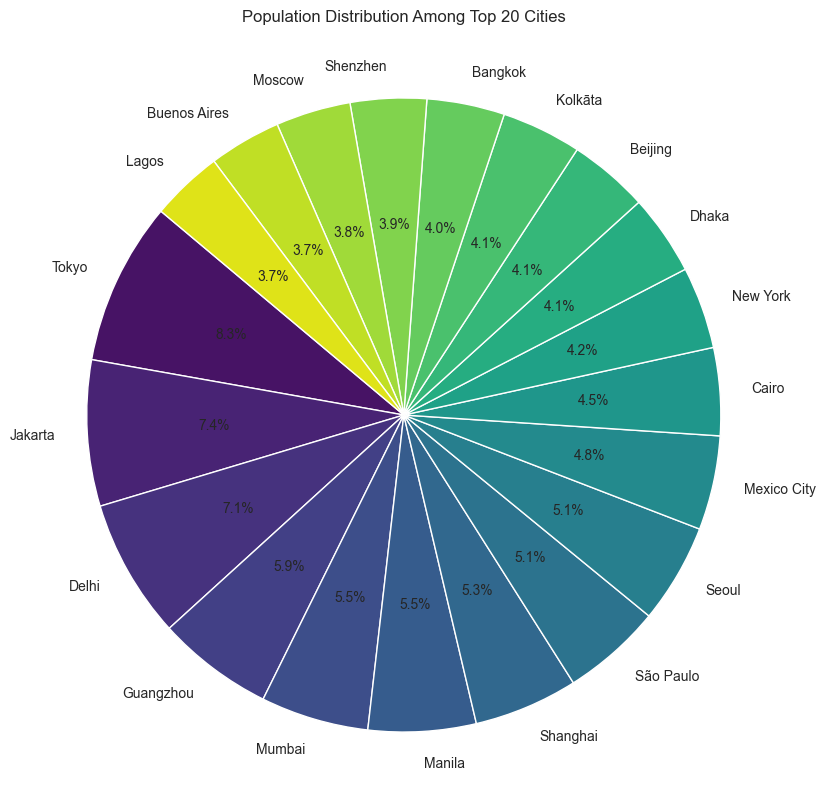

In [15]:
plt.figure(figsize=(9, 10))
plt.pie(p, labels=cities, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(cities)))
plt.axis('equal')
plt.title('Population Distribution Among Top 20 Cities')
plt.show()

In [16]:
print(top20_population[['city', 'country', 'population']])
print("Countries with most cities in the top list:", top20_population['country'].value_counts().idxmax())

            city        country  population
0          Tokyo          Japan  37732000.0
1        Jakarta      Indonesia  33756000.0
2          Delhi          India  32226000.0
3      Guangzhou          China  26940000.0
4         Mumbai          India  24973000.0
5         Manila    Philippines  24922000.0
6       Shanghai          China  24073000.0
7      São Paulo         Brazil  23086000.0
8          Seoul    South Korea  23016000.0
9    Mexico City         Mexico  21804000.0
10         Cairo          Egypt  20296000.0
11      New York  United States  18972871.0
12         Dhaka     Bangladesh  18627000.0
13       Beijing          China  18522000.0
14       Kolkāta          India  18502000.0
15       Bangkok       Thailand  18007000.0
16      Shenzhen          China  17619000.0
17        Moscow         Russia  17332000.0
18  Buenos Aires      Argentina  16710000.0
19         Lagos        Nigeria  16637000.0
Countries with most cities in the top list: China


In [17]:
# Check if capital cities generally have higher populations
capital_pop_mean = wcdf[wcdf['capital'] == 'primary']['population'].mean()
non_capital_pop_mean = wcdf[wcdf['capital'] != 'primary']['population'].mean()
print(f"Mean population of capital cities: {capital_pop_mean}")
print(f"Mean population of non-capital cities: {non_capital_pop_mean}")

Mean population of capital cities: 2626953.410041841
Mean population of non-capital cities: 100770.8794427455


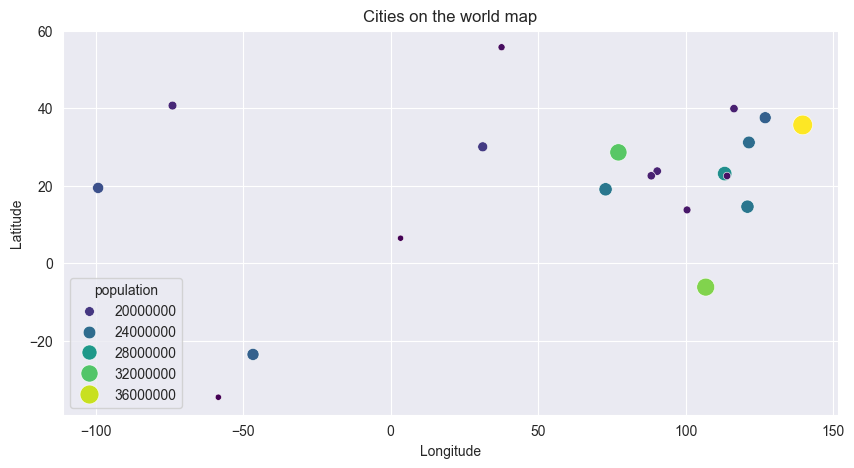

In [18]:
# scatterplot top20 populated lng and lat using seaborn
plt.figure(figsize=(10, 5))
# https://seaborn.pydata.org/tutorial/color_palettes.html#perceptually-uniform-palettes
sns.scatterplot(x='lng', y='lat', data=top20_population, hue='population', size='population', sizes=(20, 200), palette='viridis')
plt.title('Cities on the world map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

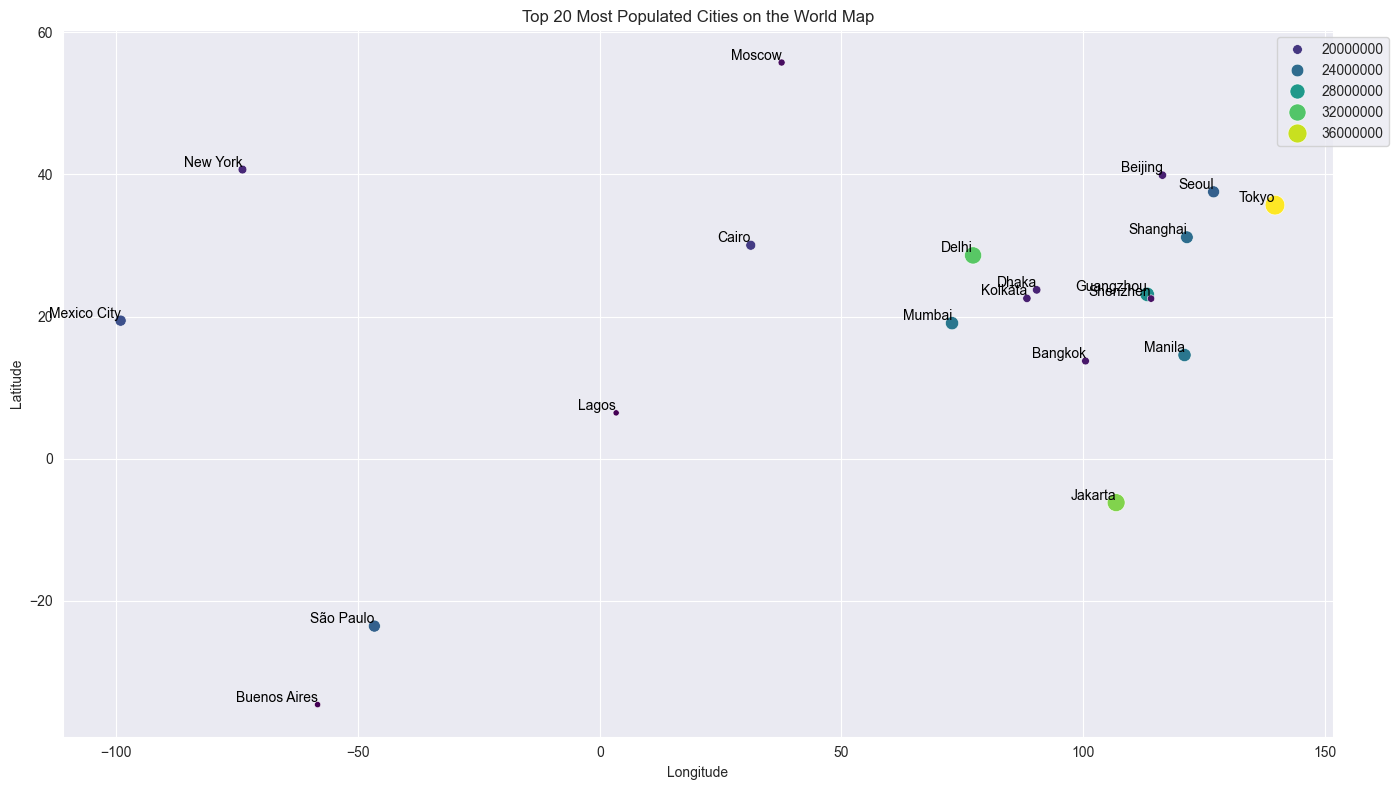

In [19]:
# improve plot visualization
plt.figure(figsize=(14, 8))
sns.scatterplot(x='lng', y='lat', data=top20_population, hue='population', size='population', sizes=(20, 200), palette='viridis')

# Add city name labels to each point
for i in range(top20_population.shape[0]):
    # s specifies the text (city name) from the ith row
    # iat or iloc can both be used here
    plt.text(x=top20_population.lng.iat[i], y=top20_population.lat.iat[i], s=top20_population.city.iat[i],
             fontsize=10, ha='right', va='bottom', color='black')

plt.title('Top 20 Most Populated Cities on the World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout()
plt.show()

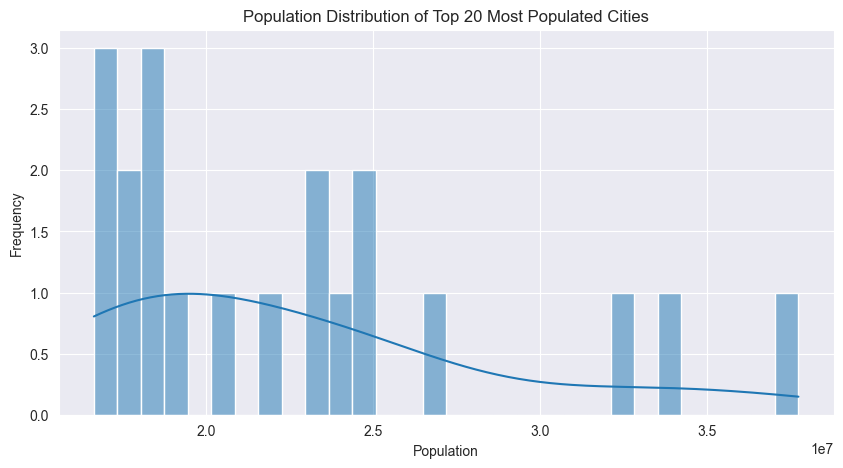

In [20]:
# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(top20_population['population'], bins=30, kde=True)
plt.title('Population Distribution of Top 20 Most Populated Cities')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Compute correlation
correlation_matrix = wcdf[['lat', 'lng', 'population']].corr()

# Print correlation
print("Correlation between latitude and population:", correlation_matrix.loc['lat', 'population'])
print("Correlation between longitude and population:", correlation_matrix.loc['lng', 'population'])

Correlation between latitude and population: -0.0070126695617095305
Correlation between longitude and population: 0.0762893293056457


In [22]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,lat,lng,population
lat,1.000000,0.017285,-0.007013
lng,0.017285,1.000000,0.076289
population,-0.007013,0.076289,1.000000


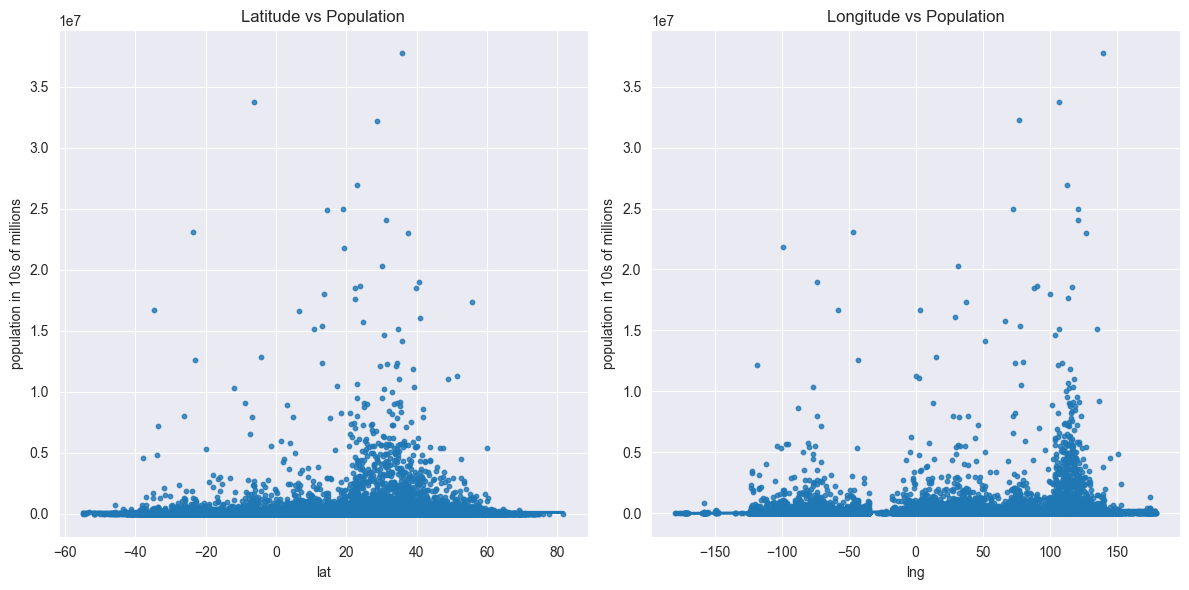

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='lat', y='population', data=wcdf, scatter_kws={'s':10})
plt.title('Latitude vs Population')
plt.ylabel('population in 10s of millions')

plt.subplot(1, 2, 2)
sns.regplot(x='lng', y='population', data=wcdf, scatter_kws={'s':10})
plt.title('Longitude vs Population')
plt.ylabel('population in 10s of millions')

plt.tight_layout()
plt.show()

In [24]:
# If the correlation value is close to 1 or -1, it indicates a strong linear relationship.
# If the correlation value is close to 0, it indicates no linear relationship.